## Importación de librerías

In [21]:
# Importación de librerías
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de Pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Para visualizar todas las columnas de los DataFrames

## Carga de datos

In [22]:
df = pd.read_csv("../Data/dataset_estudiantes.csv", index_col = 0)

df.head()

,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
horas_estudio_semanal,,,,,,,,,,
8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


## Análisis exploratorio

In [23]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 1000, y el número de columnas es 10


In [24]:
df.columns

Index(['nota_anterior', 'tasa_asistencia', 'horas_sueno', 'edad',
       'nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje', 'nota_final', 'aprobado'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 8.957475998038344 to 4.968947416773296
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nota_anterior              1000 non-null   float64
 1   tasa_asistencia            1000 non-null   float64
 2   horas_sueno                850 non-null    float64
 3   edad                       1000 non-null   int64  
 4   nivel_dificultad           1000 non-null   object 
 5   tiene_tutor                1000 non-null   object 
 6   horario_estudio_preferido  900 non-null    object 
 7   estilo_aprendizaje         950 non-null    object 
 8   nota_final                 1000 non-null   float64
 9   aprobado                   1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 85.9+ KB


## los datos no tienen campo ID, por lo tanto se valida la detección de registros duplicados exactos

In [26]:

print(f"El número de registros duplicados es {df.duplicated().sum()}")

El número de registros duplicados es 0


In [27]:
df.drop_duplicates(inplace=True)

## Identificación de nulos

In [28]:
df.isna().sum()

nota_anterior                  0
tasa_asistencia                0
horas_sueno                  150
edad                           0
nivel_dificultad               0
tiene_tutor                    0
horario_estudio_preferido    100
estilo_aprendizaje            50
nota_final                     0
aprobado                       0
dtype: int64

### Identificar variables numéricas y categóricas

In [29]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:\n\n", num_cols)
print("\nVariables categóricas:\n\n", cat_cols)

Variables numéricas:

 Index(['nota_anterior', 'tasa_asistencia', 'horas_sueno', 'edad', 'nota_final',
       'aprobado'],
      dtype='object')

Variables categóricas:

 Index(['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje'],
      dtype='object')


## Variables numéricas

### Estadísticas descriptivas

In [30]:
# Genera el describe original
desc = df[num_cols].describe().T

# Añade la mediana y la moda
desc['median'] = df[num_cols].median()
# df.mode() devuelve un DataFrame: tomamos la primera fila como modo de cada columna
desc['mode'] = df[num_cols].mode().iloc[0]

# Redondea y muestra
desc.round(2)

,count,mean,std,min,25%,50%,75%,max,median,mode
nota_anterior,1000.0,69.89,14.69,30.0,59.88,70.00,80.12,100.0,70.00,100.0
tasa_asistencia,1000.0,73.99,18.20,20.0,61.51,75.00,88.49,100.0,75.00,100.0
horas_sueno,850.0,7.01,1.44,4.0,6.00,7.02,8.02,10.0,7.02,4.0
edad,1000.0,23.53,3.48,18.0,21.00,24.00,27.00,29.0,24.00,18.0
nota_final,1000.0,71.44,9.56,30.0,64.78,71.40,77.90,100.0,71.40,72.8
aprobado,1000.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0,1.00,1.0


### Visualizaciones

Graficar histogramas para variables numéricas

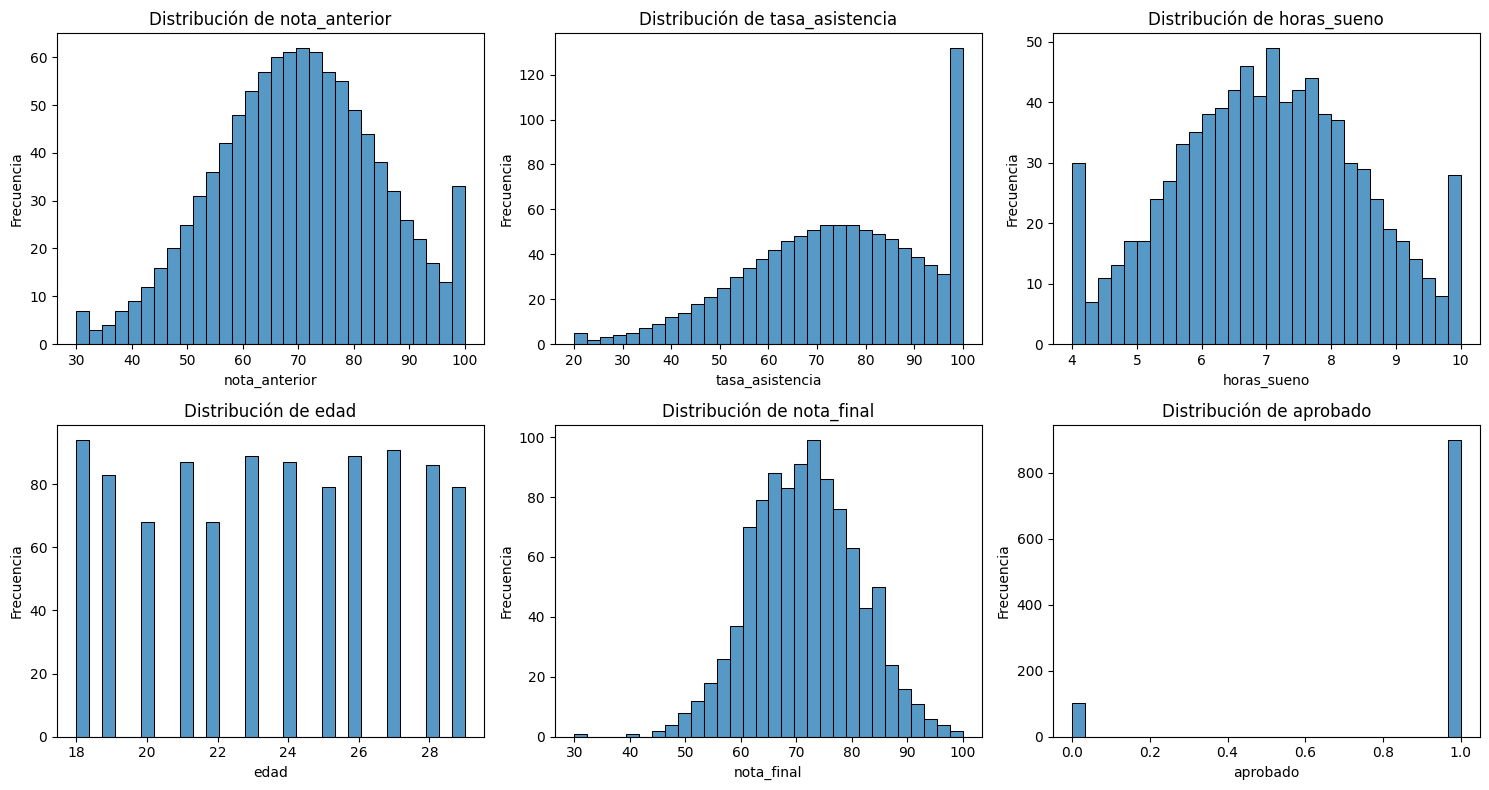

In [31]:
ncols = 3
nrows = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

# Aplanamos el array de ejes para iterar más cómodamente
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], bins=30, edgecolor='black', ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Si tienes celdas de más (por si nrows*ncols > len(num_cols)), las ocultas:
for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

## Variables categóricas

### Estadísticas descriptivas

In [32]:
df.describe(include = "object").T

,count,unique,top,freq
nivel_dificultad,1000,3,Medio,504
tiene_tutor,1000,2,No,597
horario_estudio_preferido,900,3,Noche,344
estilo_aprendizaje,950,4,Visual,363


### Valores únicos y frecuencias

In [33]:
for col in cat_cols:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{col}' -----------\n")
    print(f"Valores únicos: {df[col].unique()}\n")
    print("Frecuencias de los valores únicos de las categorías:")
    display(df[col].value_counts())

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'nivel_dificultad' -----------

Valores únicos: ['Fácil' 'Difícil' 'Medio']

Frecuencias de los valores únicos de las categorías:


nivel_dificultad
Medio      504
Fácil      313
Difícil    183
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'tiene_tutor' -----------

Valores únicos: ['Sí' 'No']

Frecuencias de los valores únicos de las categorías:


tiene_tutor
No    597
Sí    403
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'horario_estudio_preferido' -----------

Valores únicos: ['Tarde' 'Mañana' nan 'Noche']

Frecuencias de los valores únicos de las categorías:


horario_estudio_preferido
Noche     344
Tarde     337
Mañana    219
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'estilo_aprendizaje' -----------

Valores únicos: ['Lectura/Escritura' nan 'Visual' 'Auditivo' 'Kinestésico']

Frecuencias de los valores únicos de las categorías:


estilo_aprendizaje
Visual               363
Auditivo             254
Kinestésico          178
Lectura/Escritura    155
Name: count, dtype: int64

### Visualizaciones

Graficar gráficos de barras para variables categóricas

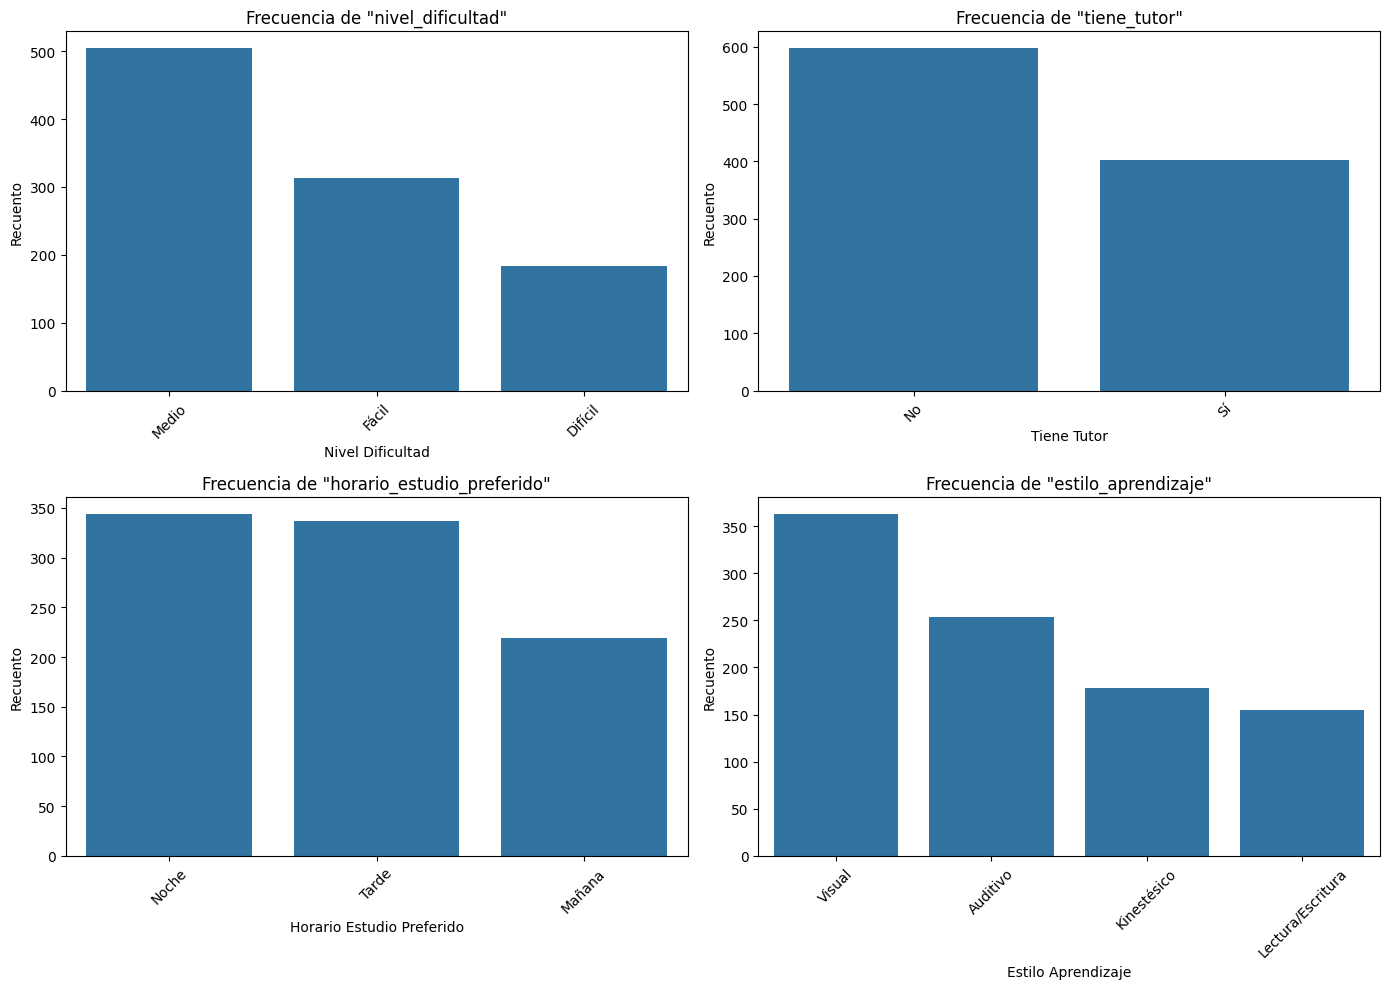

In [34]:
# en el top de tu script
df = df.reset_index(drop=True)

# Configura subplots 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    # Graficar el countplot en el eje correspondiente
    sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().index,
        ax=ax
    )
    ax.set_title(f'Frecuencia de "{col}"')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Recuento')
    ax.tick_params(axis='x', rotation=45)

# Oculta cualquier eje sobrante
for ax in axes[len(cat_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

## Matriz de correlación

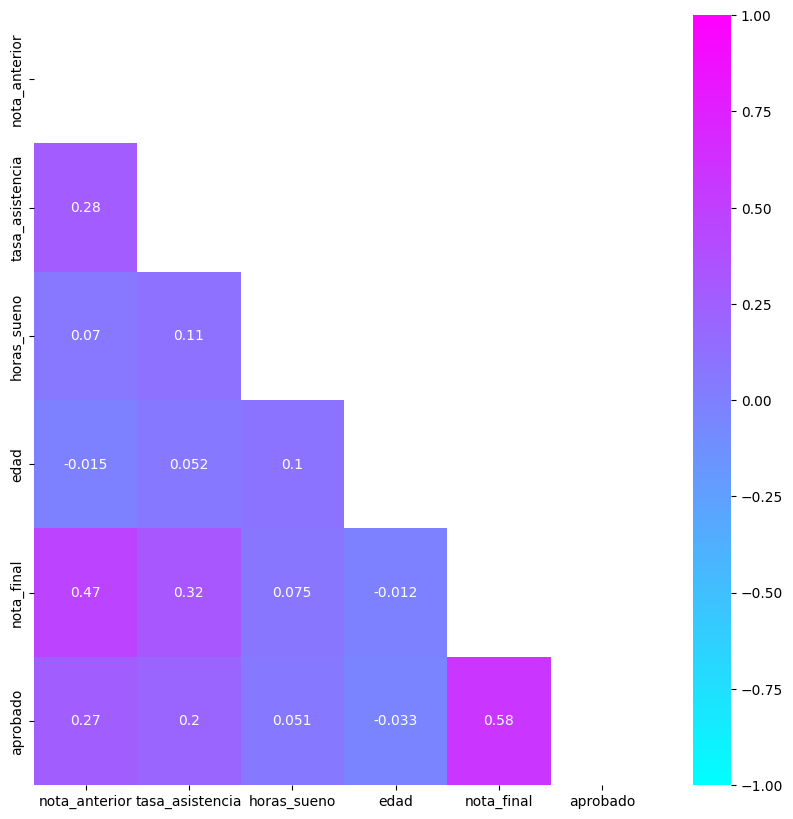

In [35]:
# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Crear la figura
plt.figure(figsize=(10, 10))

# Crear una máscara para mostrar solo la parte triangular
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Graficar el mapa de calor
sns.heatmap(corr_matrix, 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            mask=mask,
            cmap='cool')

plt.show()

## Relaciones cruzadas

### Variable objetivo numérica `Nota_final`

Generamos gráficos de dispersión

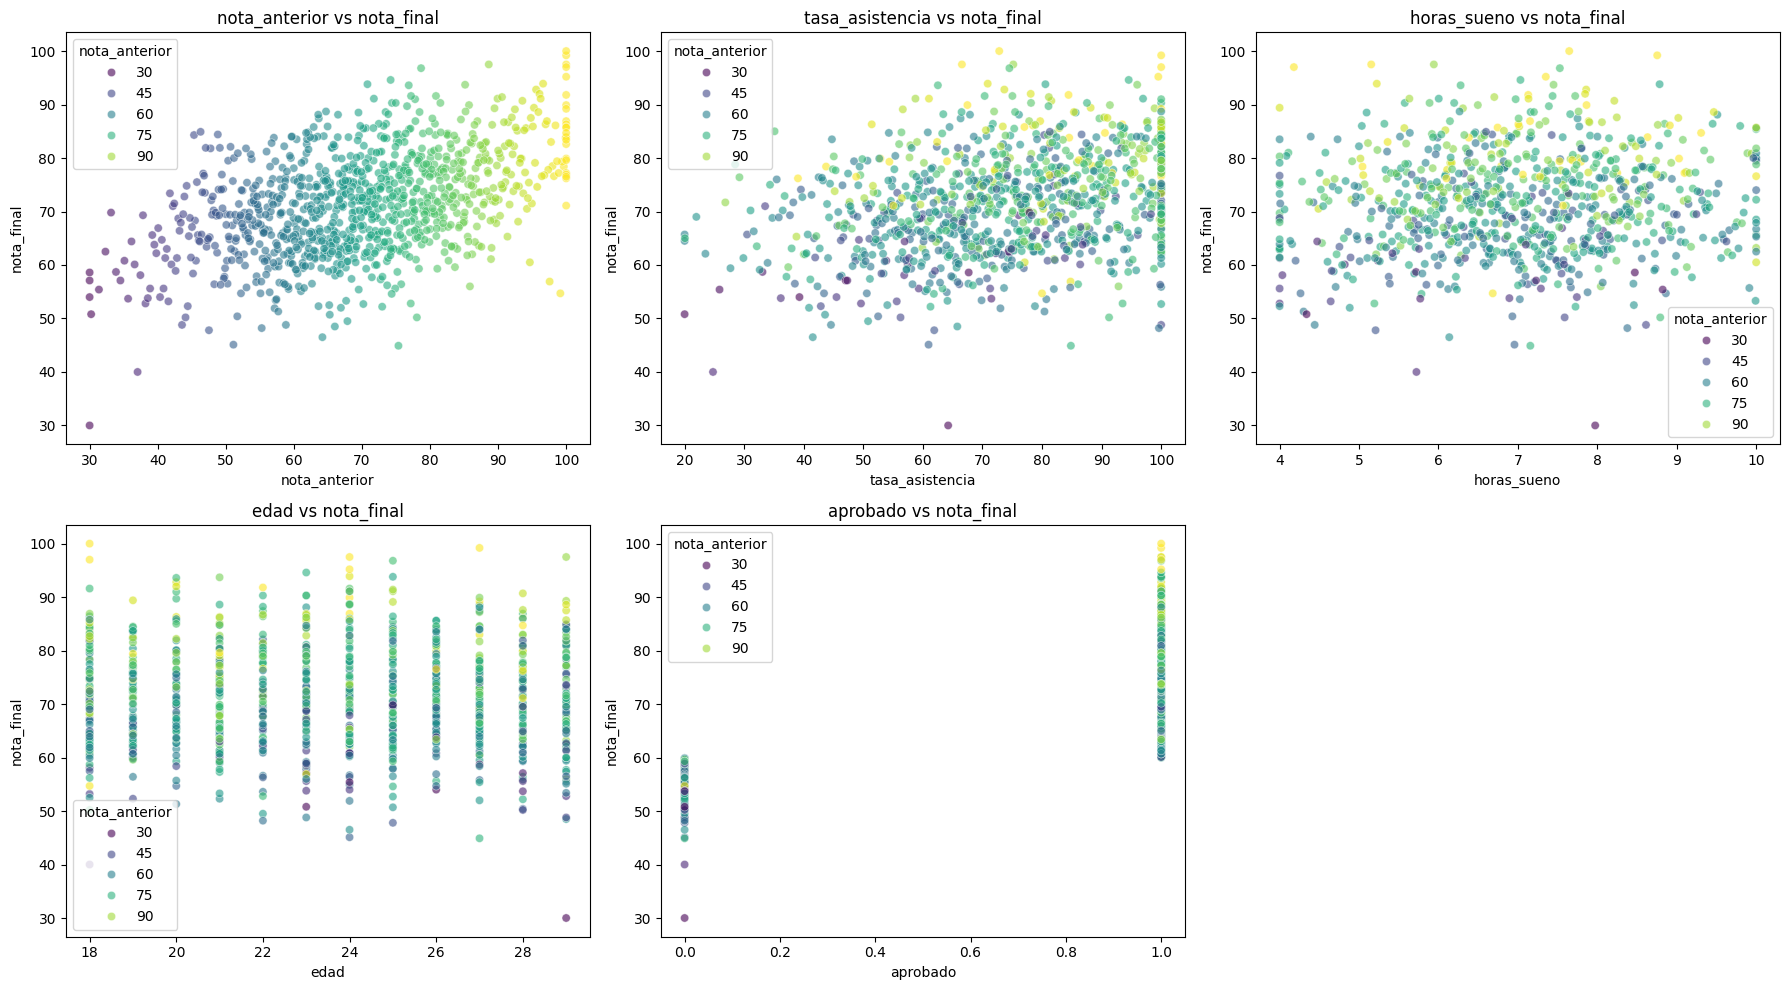

In [36]:
# Variable objetivo
tv = 'nota_final'

# DataFrame sólo con numéricas (excepto la target)
df_num = df.select_dtypes(include=np.number).drop(columns=[tv], errors='ignore')
cols_num = df_num.columns.tolist()

# Configura la cuadrícula de subplots
n = len(cols_num)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()

# Dibuja cada scatter en su propio subplot
for ax, col in zip(axes, cols_num):
    sns.scatterplot(
        x=df[col],
        y=df[tv],
        hue=df['nota_anterior'],
        palette='viridis',
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f'{col} vs {tv}')
    ax.set_xlabel(col)
    ax.set_ylabel(tv)

# Oculta ejes sobrantes si los hay
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_25658/3634573310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_25658/3634573310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_25658/3634573310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_25658/3634573310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

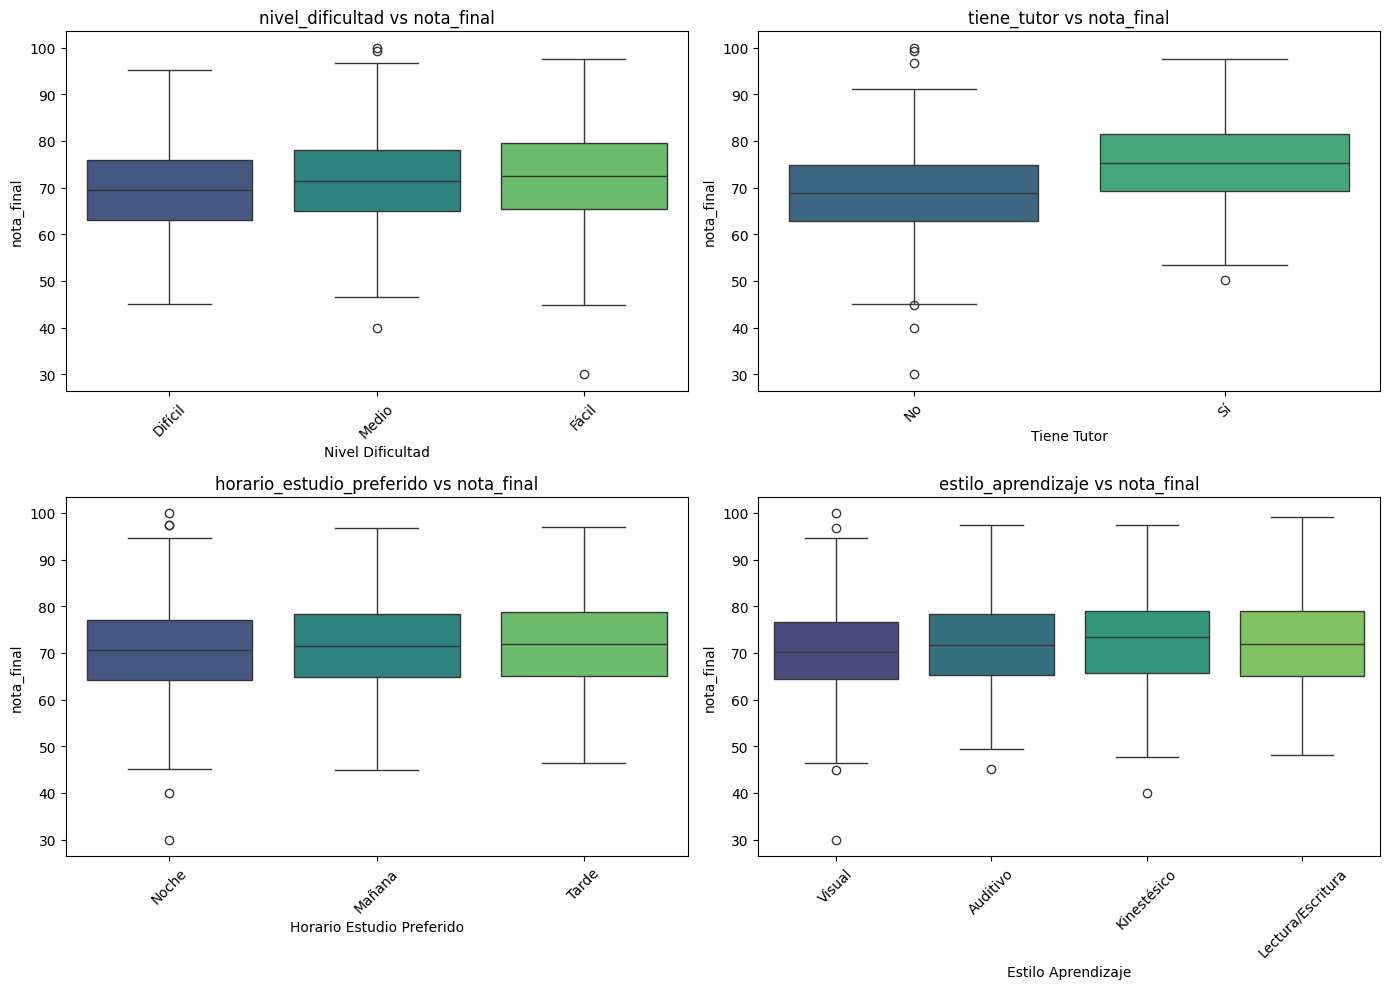

In [37]:
# Gráfico de caja para variables categóricas vs variable objetivo
# Prepara la cuadrícula de subplots
n = len(cat_cols)
ncols = 2
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    # Orden de categorías según la media de la nota_final
    ordered = df.groupby(col)[tv].mean().sort_values().index
    
    sns.boxplot(
        x=col,
        y=tv,
        data=df,
        order=ordered,
        palette='viridis',
        ax=ax
    )
    ax.set_title(f'{col} vs {tv}')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel(tv)
    ax.tick_params(axis='x', rotation=45)

# Oculta ejes sobrantes si hay alguno
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

---

### Relación de la variable objetivo con la variables categóricas

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_25658/4179117106.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_25658/4179117106.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_25658/4179117106.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_25658/4179117106.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00

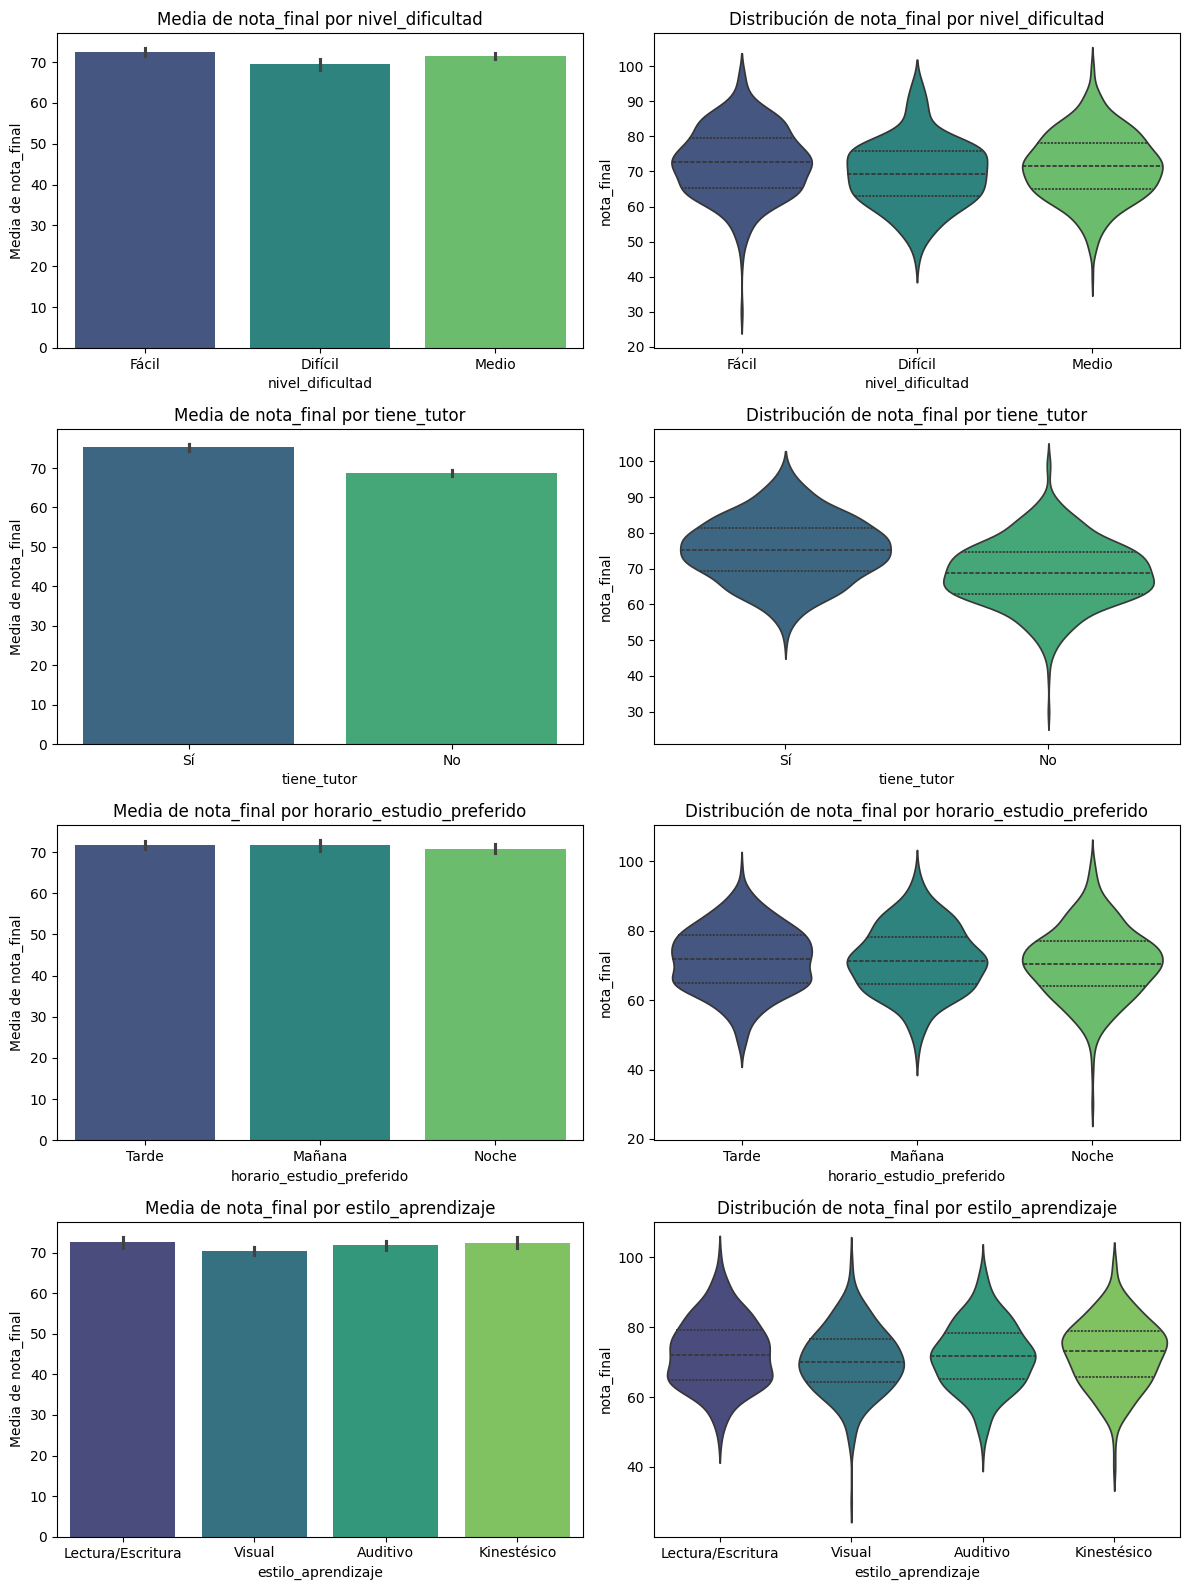

In [38]:
# Gráficos de barras y violines para variables categóricas vs variable objetivo

# en el top de tu script
df = df.reset_index(drop=True)


tv = 'nota_final'
cats = [c for c in cat_cols if c != tv]
n = len(cats)

# Ajusta altura: por ejemplo 4 pulgadas de alto por variable
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 4 * n), squeeze=False)

for i, col in enumerate(cats):
    # 1) Barplot de medias ± IC95%
    sns.barplot(
        x=col, y=tv, data=df,
        ci=95, palette="viridis",
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f"Media de {tv} por {col}")
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel(f"Media de {tv}")

    # 2) Violinplot con cuartiles
    sns.violinplot(
        x=col, y=tv, data=df,
        palette="viridis", inner="quartile",
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"Distribución de {tv} por {col}")
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel(tv)

plt.tight_layout()
plt.show()



## Análisis de incosinstencias

In [39]:
# Análisis de inconsistencias en el DataFrame
inconsistencies = []

# Regla 1: nota_anterior no puede ser menor que 0 ni mayor que 100
mask = (df['nota_anterior'] < 0) | (df['nota_anterior'] > 100)
for i in df.index[mask]:
    inconsistencies.append((i, 'nota_anterior fuera de [0, 100]'))

# Regla 2: nota_final no puede ser menor que 0 ni mayor que 100
mask = (df['nota_final'] < 0) | (df['nota_final'] > 100)
for i in df.index[mask]:
    inconsistencies.append((i, 'nota_final fuera de [0, 100]'))

# Regla 3: aprobado == 1 sólo si nota_final ≥ 60
mask = (df['aprobado'] == 1) & (df['nota_final'] < 60)
for i in df.index[mask]:
    inconsistencies.append((i, 'aprobado=1 pero nota_final<60'))

# Regla 4: aprobado == 0 sólo si nota_final < 60
mask = (df['aprobado'] == 0) & (df['nota_final'] >= 60)
for i in df.index[mask]:
    inconsistencies.append((i, 'aprobado=0 pero nota_final>=60'))

# Regla 5: tasa_asistencia no puede ser menor que 0 ni mayor que 100
mask = (df['tasa_asistencia'] < 0) | (df['tasa_asistencia'] > 100)
for i in df.index[mask]:
    inconsistencies.append((i, 'tasa_asistencia fuera de [0, 100]'))

# Regla 6: horas_sueno no puede ser menor que 0 ni mayor que 24
mask = (df['horas_sueno'] < 0) | (df['horas_sueno'] > 24)
for i in df.index[mask]:
    inconsistencies.append((i, 'horas_sueno fuera de [0, 24]'))

# Crear DataFrame de inconsistencias
inconsistencies_df = pd.DataFrame(inconsistencies, columns=['Index', 'Inconsistency'])

# Obtener los índices únicos de las inconsistencias
inconsistent_indices = inconsistencies_df['Index'].unique()

# Filtrar el DataFrame original para ver las filas inconsistentes
df_inconsistent_rows = df.loc[inconsistent_indices]

# Mostrar resultados
print("Inconsistencias encontradas:")
print(inconsistencies_df)
print("\nFilas con inconsistencias:")
display(df_inconsistent_rows)



Inconsistencias encontradas:
Empty DataFrame
Columns: [Index, Inconsistency]
Index: []

Filas con inconsistencias:


,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado


Guardamos el dataframe de nuevo

In [40]:
df.to_csv('../data/dataset_estudiantes_EDA.csv')